# Algoritma *K-Nearest Neighbor*

## Mari berkenalan dengan Algoritma KNN

insert penjelasan here...

## Mengimpor Pustaka

Pada bagian ini akan diimpor beberapa pustaka yang akan digunakan untuk menyimulasikan Algoritma *K-Nearest Neighbor*.

In [1]:
import pandas as pd
import numpy as np

Selain itu, akan dipanggil juga modul KNN yang telah dibangun *from scratch*

In [2]:
from algorithm.knn import KNNAlgorithm

## Mengimpor *Dataset*

Pada bagian ini akan diimpor *dataset* yang sebelumnya telah terbagi menjadi `data_train.csv` dan `data_validation.csv`.

In [3]:
# Mengambil data train dan data validation
df_train = pd.read_csv("../data/data_train.csv")
df_validation = pd.read_csv("../data/data_validation.csv")

# *Pre-processing* Data

Tahap yang dilakukan meliputi pemisahan kolom target hingga melakukan standarisasi terhadap data sebelum dilakukan pemrosesan dengan Algoritma KNN.

In [4]:
# Melakukan pemisahan kolom target
x_train = df_train.drop(["price_range"], axis=1)
y_train = df_train["price_range"]

x_test = df_validation.drop(["price_range"], axis=1)
y_test = df_validation["price_range"]

In [5]:
# Standarisasi data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Hasil Pemrosesan Algoritma KNN yang Dibangun

Berikut adalah hasil pemrosesan Algoritma KNN yang dibangun *from scratch*.

In [6]:
# Gunakan model KNN yang sebelumnya dibangun
knn_scratch = KNNAlgorithm(5)       # Gunakan nilai k = 5 sebagai nilai awal

# Lakukan fit model
knn_scratch.fit(x_train, y_train)

# Lakukan prediksi dengan data validation
y_pred_scratch = knn_scratch.predict(x_test)

In [7]:
# Pengujian kualitas model dengan metrik
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test, y_pred_scratch))
print("Akurasi : ", 100 * np.round(accuracy_score(y_test, y_pred_scratch), 5), "%")

              precision    recall  f1-score   support

           0       0.62      0.78      0.69       142
           1       0.38      0.42      0.40       144
           2       0.37      0.35      0.36       155
           3       0.74      0.52      0.61       159

    accuracy                           0.51       600
   macro avg       0.52      0.52      0.51       600
weighted avg       0.53      0.51      0.51       600

Akurasi :  51.333 %


## Hasil Pemrosesan Algoritma KNN Pembanding

Hasil pemrosesan diatas akan dibandingkan dengan hasil yang diperoleh dari *library* scikit-learn

In [8]:
# Pemanggilan model KNN dari scikit-learn
from sklearn.neighbors import KNeighborsClassifier

knn_scikit = KNeighborsClassifier(n_neighbors=5)        # Dengan menggunakan nilai k yang sama
knn_scikit.fit(x_train, y_train)
y_pred_scikit = knn_scikit.predict(x_test)

In [9]:
# Pengujian kualitas model dengan metrik
print(classification_report(y_test, y_pred_scikit))
print("Akurasi : ", 100 * np.round(accuracy_score(y_test, y_pred_scikit), 5), "%")

              precision    recall  f1-score   support

           0       0.62      0.78      0.69       142
           1       0.38      0.42      0.40       144
           2       0.37      0.35      0.36       155
           3       0.74      0.52      0.61       159

    accuracy                           0.51       600
   macro avg       0.52      0.52      0.51       600
weighted avg       0.53      0.51      0.51       600

Akurasi :  51.333 %


## Hasil yang diperoleh

Berdasarkan kedua hasil tersebut, diperoleh **hasil yang sama** antara nilai prediksi yang dihasilkan oleh model KNN yang dibangun *from scratch* dengan model yang dimiliki scikit-learn.

In [10]:
# Pengujian kualitas model dengan metrik
print(classification_report(y_pred_scratch, y_pred_scikit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00       159
           2       1.00      1.00      1.00       150
           3       1.00      1.00      1.00       111

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



## Apakah sudah merupakan model yang terbaik?

Belum tentu! proses kalkulasi untuk mendapatkan model dengan akurasi yang tinggi memerlukan pemilihan nilai k yang baik. Melalui eksperimen diatas, telah dilakukan percobaan pemilihan nilai k = 5 dan diperoleh nilai akurasi sebesar 51.33 %. Angka ini tentu saja masih dapat ditingkatkan dengan melakukan pemilihan nilai k yang dapat memaksimalkan nilai akurasi.

## Memperkenalkan *Cross-validation*

Menemukan nilai terbaik untuk hyperparameter 'k' di *K-Nearest Neighbor* (KNN) melibatkan proses yang disebut *hyperparameter tuning*. Salah satu pendekatan yang umum adalah dengan menggunakan *cross-validation*.
Berikut adalah detail prosedurnya
1. Pemilihan Jumlah Subset (*Fold*)<br/> 
*Dataset* dibagi menjadi beberapa subset yang disebut "fold." Misalnya, dalam *5-fold cross-validation*, *dataset* dibagi menjadi 5 bagian. Proses pelatihan dan pengujian akan dilakukan sebanyak 5 kali, di mana setiap *fold* digunakan sebagai subset pengujian satu kali, dan sisanya digunakan sebagai subset pelatihan.<br/>
2. Pelatihan dan Pengujian Berulang<br/> 
Model pembelajaran mesin dilatih pada subset pelatihan dan diuji pada subset pengujian untuk setiap iterasi *cross-validation*. Proses ini dilakukan sebanyak jumlah *fold* yang telah ditentukan. <br/>
3. Perhitungan Metrik Kinerja<br/> 
Metrik kinerja seperti akurasi, presisi, *recall*, atau *F1-score* dihitung untuk setiap iterasi *cross-validation*. Metrik ini memberikan gambaran tentang seberapa baik model berkinerja pada berbagai subset data.

Berikut adalah prosedur yang dilakukan untuk melakukan *cross-validation* dengan menggunakan *library* milik scikit-learn.

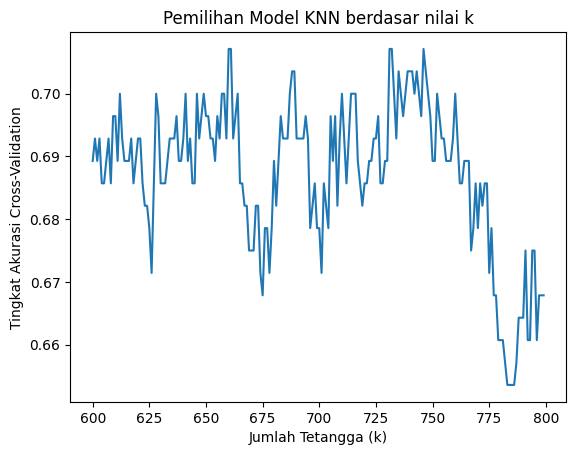

Nilai k terbaik adalah : 660, 60


In [11]:
# Impor library yang diperlukan
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Menemukan nilai 'k' terbaik dengan cross-validation
k_values = list(range(600, 800))      # Iterasi dilakukan pada rentang k antara 1 - 300
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')  # Digunakan 5-fold cross-validation
    cv_scores.append(np.max(scores))

# Membuat ilustrasi perbandingan pemilihan nilai k dengan akurasi
plt.plot(k_values, cv_scores)
plt.xlabel('Jumlah Tetangga (k)')
plt.ylabel('Tingkat Akurasi Cross-Validation')
plt.title('Pemilihan Model KNN berdasar nilai k')
plt.show()

# Memilih nilai k yang memiliki nilai akurasi terbaik
best_k = k_values[np.argmax(cv_scores)]
print(f'Nilai k terbaik adalah : {best_k}, {np.argmax(cv_scores)}')

Setelah mendapatkan nilai k terbaik, mari kembali lakukan pengujian menggunakan Algoritma KNN yang telah dibangun sebelumnya

In [12]:
# Gunakan model KNN yang sebelumnya dibangun
# knn_scratch = KNNAlgorithm(best_k)       # Gunakan nilai k yang terbaik
knn_scratch = KNeighborsClassifier(n_neighbors=best_k)

# Lakukan fit model
knn_scratch.fit(x_train, y_train)

# Lakukan prediksi dengan data validation
y_pred_scratch = knn_scratch.predict(x_test)

In [13]:
# Pengujian kualitas model dengan metrik
print(classification_report(y_test, y_pred_scratch))
print("Akurasi : ", 100 * np.round(accuracy_score(y_test, y_pred_scratch), 5), "%")

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       142
           1       0.58      0.57      0.57       144
           2       0.54      0.63      0.58       155
           3       0.91      0.59      0.72       159

    accuracy                           0.68       600
   macro avg       0.70      0.68      0.68       600
weighted avg       0.70      0.68      0.67       600

Akurasi :  67.5 %


Terlihat bahwa dengan melakukan cross-validation pada rentang nilai k dari 1 hingga 300, diperoleh nilai k terbaik adalah 254 dengan nilai akurasi 64.83 %. Angka ini meningkat 0.26 kali lebih baik dari akurasi sebelumnya!

## Penyimpanan dan *Load* Model

Agar model dapat digunakan kembali, maka model harus dapat disimpan dan di-*load*. Berikut adalah implementasi penyimpanan model yang dilakukan menggunakan *library* pickle.

In [14]:
import pickle

# Menyimpan model dalam pkl
model_pkl_file = "models/knn_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(knn_scratch, file)

Untuk membuktikan bahwa model berhasil tersimpan, berikut adalah pembuktian pemanggilan kembali hasil prediksi model yang disimpan

In [15]:
# Load kembali model dari pkl
with open(model_pkl_file, 'rb') as file:  
    model = pickle.load(file)

# Melakukan prediksi dengan model tersebut
y_pickle = model.predict(x_test)

# Menguji hasil akurasi model
print(classification_report(y_test, y_pickle)) 

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       142
           1       0.58      0.57      0.57       144
           2       0.54      0.63      0.58       155
           3       0.91      0.59      0.72       159

    accuracy                           0.68       600
   macro avg       0.70      0.68      0.68       600
weighted avg       0.70      0.68      0.67       600



Terbukti bahwa model pkl yang disimpan berhasil untuk digunakan kembali.

## [Bonus] Submisi Kaggle

Bagian ini dikhususkan untuk pemrosesan data dan penggunaan model yang dibuat sebagai dasar membuat submisi pada Kaggle.

In [27]:
# Impor dataset
test_data = pd.read_csv('../data/test.csv')

features = test_data.drop(["id"], axis=1)  # menghapus kolom "id"

# Gunakan model KNN yang sebelumnya dibangun
knn_kaggle = KNeighborsClassifier(n_neighbors=660)

# Lakukan fit model
knn_kaggle.fit(x_train, y_train)

# Lakukan prediksi dengan data validation
feature_test = scaler.transform(features)
predictions = knn_kaggle.predict(feature_test)

# Membuat dataframe hasil
result_df = pd.DataFrame({'id': test_data['id'], 'price_range': predictions})

# Menyimpan dataframe dalam csv
result_df.to_csv('../result/predictions-knn.csv', index=False)